Index(['failure', 'smart_1_normalized', 'smart_1_raw', 'smart_3_normalized',
       'smart_3_raw', 'smart_4_normalized', 'smart_4_raw',
       'smart_5_normalized', 'smart_5_raw', 'smart_7_normalized',
       'smart_7_raw', 'smart_9_normalized', 'smart_9_raw',
       'smart_10_normalized', 'smart_10_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_183_normalized', 'smart_183_raw',
       'smart_184_normalized', 'smart_184_raw', 'smart_187_normalized',
       'smart_187_raw', 'smart_188_normalized', 'smart_188_raw',
       'smart_189_normalized', 'smart_189_raw', 'smart_190_normalized',
       'smart_190_raw', 'smart_191_normalized', 'smart_191_raw',
       'smart_192_normalized', 'smart_192_raw', 'smart_193_normalized',
       'smart_193_raw', 'smart_194_normalized', 'smart_194_raw',
       'smart_197_normalized', 'smart_197_raw', 'smart_198_normalized',
       'smart_198_raw', 'smart_199_normalized', 'smart_199_raw',
       'smart_240_normalized', 'smart_240_raw', 'smart_241

C:\Users\MACHENIKE\AppData\Local\Temp\ipykernel_11612\4157818266.py:36: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['failure'] == 0][attribute], color="green", label="Healthy", fill=True, alpha=0.4, ax=axes[i])
C:\Users\MACHENIKE\AppData\Local\Temp\ipykernel_11612\4157818266.py:37: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['failure'] == 1][attribute], color="red", label="Failure", fill=True, alpha=0.4, ax=axes[i])
C:\Users\MACHENIKE\AppData\Local\Temp\ipykernel_11612\4157818266.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
C:\Users\MACHENIKE\AppData\Local\Temp\ipykernel_11612\4157818266.py:36: UserWarning: Dataset has 0 variance; skipping density estimate.

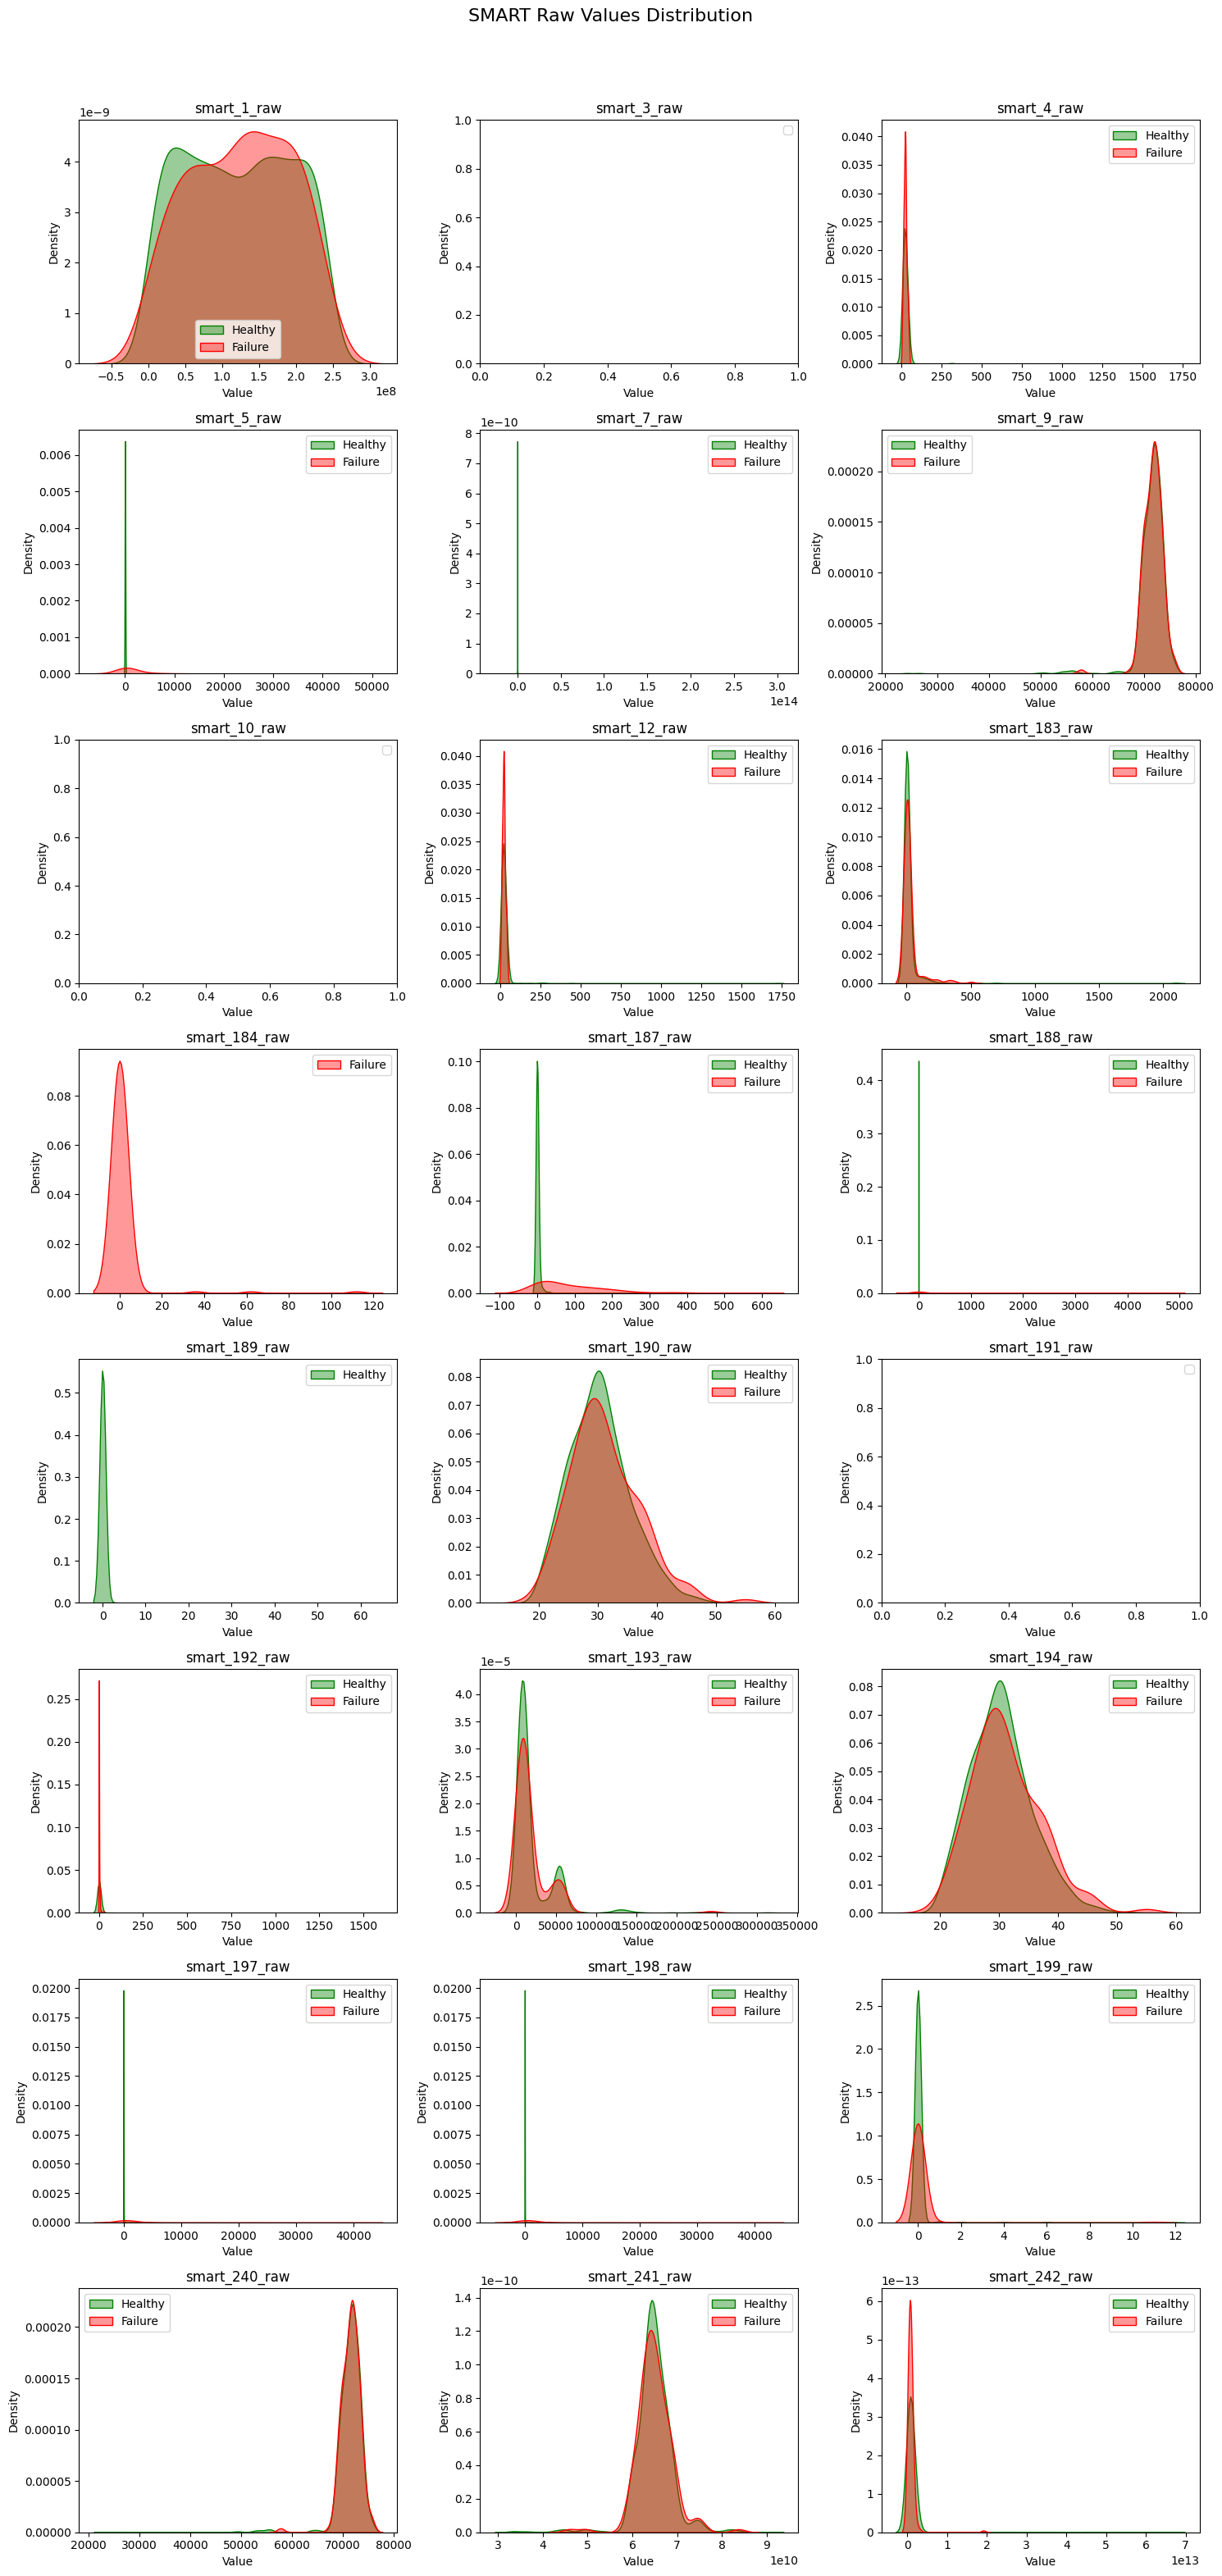

模型在测试集上的准确率: 0.9492
模型的精确率 (Precision): 0.8553
模型的召回率 (Recall): 0.7535
模型的 F1 分数: 0.7941
False Positive Rate (FPR): 0.0147

交叉验证结果 (所有特征):
平均准确率: 0.9633 ± 0.0079
平均精确率: 0.9290 ± 0.0345
平均召回率: 0.8508 ± 0.0220
平均F1分数: 0.8845 ± 0.0244
Index(['failure', 'smart_1_raw', 'smart_4_raw', 'smart_5_raw', 'smart_7_raw',
       'smart_12_raw', 'smart_183_raw', 'smart_184_raw', 'smart_187_raw',
       'smart_188_raw', 'smart_189_raw', 'smart_190_raw', 'smart_192_raw',
       'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw',
       'smart_199_raw', 'smart_241_raw', 'smart_242_raw'],
      dtype='object')
模型在测试集上的准确率: 0.9525
模型的精确率 (Precision): 0.8644
模型的召回率 (Recall): 0.7753
模型的 F1 分数: 0.8123
False Positive Rate (FPR): 0.0147

交叉验证结果 (筛选特征):
平均准确率: 0.9612 ± 0.0088
平均精确率: 0.8991 ± 0.0321
平均召回率: 0.8746 ± 0.0332
平均F1分数: 0.8852 ± 0.0269
          Feature    Importance
1   smart_187_raw  2.796172e-01
2   smart_197_raw  2.001145e-01
3   smart_198_raw  1.300417e-01
4     smart_5_raw  9.9230

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
import math

df = pd.read_csv("your dataset")

df.drop(columns=['Unnamed: 0', 'date', 'serial_number', 'model','capacity_bytes','datacenter','cluster_id', 'vault_id',
       'pod_id', 'pod_slot_num', 'is_legacy_format', ], errors='ignore', inplace=True)
threshold = len(df) * 0.8
df = df.dropna(axis=1,thresh=threshold)
df=df.dropna()
print(df.columns)

raw_features = [col for col in df.columns if "_raw" in col]
normalized_features = [col for col in df.columns if "_normalized" in col]
def get_subplot_grid(n):
    rows = math.ceil(n / 3) 
    cols = min(n, 3)
    return rows, cols

def plot_all_smart_attributes(features, data_type="Raw"):
    num_features = len(features)
    rows, cols = get_subplot_grid(num_features)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()   
    for i, attribute in enumerate(features):
        sns.kdeplot(df[df['failure'] == 0][attribute], color="green", label="Healthy", fill=True, alpha=0.4, ax=axes[i])
        sns.kdeplot(df[df['failure'] == 1][attribute], color="red", label="Failure", fill=True, alpha=0.4, ax=axes[i])      
        axes[i].set_title(attribute)
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Density")
        axes[i].legend()
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.suptitle(f"SMART {data_type} Values Distribution", fontsize=16)
    plt.subplots_adjust(top=0.93, bottom=0.05, left=0.05, right=0.95)  
    plt.tight_layout(rect=[0, 0, 1, 0.96])  
   # plt.tight_layout()
    plt.show()
plot_all_smart_attributes(raw_features, "Raw")
X1= df.drop(columns=['failure'])  
y1= df['failure'] 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
rf_model1 = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
rf_model1.fit(X_train1, y_train1)
y_pred1 = rf_model1.predict(X_test1)
accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1, average='macro') 
recall1 = recall_score(y_test1, y_pred1, average='macro')      
f11 = f1_score(y_test1, y_pred1, average='macro')                
tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()
fpr = fp / (fp + tn)
print(f"模型在测试集上的准确率: {accuracy1:.4f}")
print(f"模型的精确率 (Precision): {precision1:.4f}")
print(f"模型的召回率 (Recall): {recall1:.4f}")
print(f"模型的 F1 分数: {f11:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(X1, y1):
    X_train_cv, X_test_cv = X1.iloc[train_index], X1.iloc[test_index]
    y_train_cv, y_test_cv = y1.iloc[train_index], y1.iloc[test_index]
    rf_model_cv = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
    rf_model_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = rf_model_cv.predict(X_test_cv)
    accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
    precision_scores.append(precision_score(y_test_cv, y_pred_cv, average='macro'))
    recall_scores.append(recall_score(y_test_cv, y_pred_cv, average='macro'))
    f1_scores.append(f1_score(y_test_cv, y_pred_cv, average='macro'))
print("\n交叉验证结果 (所有特征):")
print(f"平均准确率: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"平均精确率: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"平均召回率: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"平均F1分数: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

kcolumns = ["Filtered features"]
dfraw=df[kcolumns]
print(dfraw.columns)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
rf_model1 = RandomForestClassifier(
   class_weight='balanced', 
    n_estimators=100,         
    max_depth=22,            
    min_samples_split=6,      
    min_samples_leaf=2,       
    max_features='sqrt',     
    bootstrap=True,          
    random_state=42
)

rf_model1.fit(X_train1, y_train1)
y_pred1 = rf_model1.predict(X_test1)

accuracy1 = accuracy_score(y_test1, y_pred1)
precision1 = precision_score(y_test1, y_pred1, average='macro')  
recall1 = recall_score(y_test1, y_pred1, average='macro')      
f11 = f1_score(y_test1, y_pred1, average='macro')                
tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()
fpr = fp / (fp + tn)

print(f"模型在测试集上的准确率: {accuracy1:.4f}")
print(f"模型的精确率 (Precision): {precision1:.4f}")#
print(f"模型的召回率 (Recall): {recall1:.4f}")
print(f"模型的 F1 分数: {f11:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(X1, y1):
    X_train_cv, X_test_cv = X1.iloc[train_index], X1.iloc[test_index]
    y_train_cv, y_test_cv = y1.iloc[train_index], y1.iloc[test_index]
    rf_model_cv = RandomForestClassifier(
        class_weight='balanced', 
        n_estimators=100,
        max_depth=22,
        min_samples_split=6,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )
    rf_model_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = rf_model_cv.predict(X_test_cv)
    accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
    precision_scores.append(precision_score(y_test_cv, y_pred_cv, average='macro'))
    recall_scores.append(recall_score(y_test_cv, y_pred_cv, average='macro'))
    f1_scores.append(f1_score(y_test_cv, y_pred_cv, average='macro'))

print("\n交叉验证结果 (筛选特征):")
print(f"平均准确率: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"平均精确率: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"平均召回率: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"平均F1分数: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

X = dfraw.drop(columns=['failure'])  
y = dfraw['failure']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(
   class_weight='balanced', 
    n_estimators=100,         
    max_depth=22,            
    min_samples_split=6,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    bootstrap=True,           
    random_state=42
)

rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.index = range(1, len(feature_importance_df) + 1)
print(feature_importance_df)

kcolumns = ["Features after further screening"]
dfraw=df[kcolumns]
print(dfraw.columns)

X2 = dfraw.drop(columns=['failure']) 
y2 = dfraw['failure'] 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

rf_model2 = RandomForestClassifier(
    class_weight='balanced', 
    n_estimators=100,         
    max_depth=22,             
    min_samples_split=6,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    bootstrap=True,           
    random_state=42
)

rf_model2.fit(X_train2, y_train2)

y_pred2 = rf_model2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2, average='macro')  
recall2 = recall_score(y_test2, y_pred2, average='macro')      
f12 = f1_score(y_test2, y_pred2, average='macro')                
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred2).ravel()
fpr = fp / (fp + tn)

print(f"模型在测试集上的准确率: {accuracy2:.4f}")
print(f"模型的精确率 (Precision): {precision2:.4f}")
print(f"模型的召回率 (Recall): {recall2:.4f}")
print(f"模型的 F1 分数: {f12:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(X2, y2):

    X_train_cv, X_test_cv = X2.iloc[train_index], X2.iloc[test_index]
    y_train_cv, y_test_cv = y2.iloc[train_index], y2.iloc[test_index]
    
    rf_model_cv = RandomForestClassifier(
        class_weight='balanced', 
        n_estimators=100,
        max_depth=22,
        min_samples_split=6,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )
    rf_model_cv.fit(X_train_cv, y_train_cv)
    y_pred_cv = rf_model_cv.predict(X_test_cv)
    
    accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
    precision_scores.append(precision_score(y_test_cv, y_pred_cv, average='macro'))
    recall_scores.append(recall_score(y_test_cv, y_pred_cv, average='macro'))
    f1_scores.append(f1_score(y_test_cv, y_pred_cv, average='macro'))

print("\n交叉验证结果 (筛选特征 - 第二次):")
print(f"平均准确率: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"平均精确率: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"平均召回率: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"平均F1分数: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

smote = SMOTE(random_state=42)
X_train2_resampled, y_train2_resampled = smote.fit_resample(X2, y2)

X_test2 = X_test2.reindex(columns=X_train2_resampled.columns, fill_value=0)

rf_model2 = RandomForestClassifier(
    class_weight='balanced', 
    n_estimators=100,      
    max_depth=22,            
    min_samples_split=6,      
    min_samples_leaf=2,     
    max_features='sqrt',     
    bootstrap=True,          
    random_state=42
)

rf_model2.fit(X_train2_resampled, y_train2_resampled)
y_pred2 = rf_model2.predict(X_test2)

accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2, average='macro')  
recall2 = recall_score(y_test2, y_pred2, average='macro')      
f12 = f1_score(y_test2, y_pred2, average='macro')                
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred2).ravel()
fpr = fp / (fp + tn)

print(f"模型在测试集上的准确率: {accuracy2:.4f}")
print(f"模型的精确率 (Precision): {precision2:.4f}")
print(f"模型的召回率 (Recall): {recall2:.4f}")
print(f"模型的 F1 分数: {f12:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in skf.split(X2, y2):

    X_train_cv, X_test_cv = X2.iloc[train_index], X2.iloc[test_index]
    y_train_cv, y_test_cv = y2.iloc[train_index], y2.iloc[test_index]
    smote = SMOTE(random_state=42)
    X_train_cv_resampled, y_train_cv_resampled = smote.fit_resample(X_train_cv, y_train_cv)
    rf_model_cv = RandomForestClassifier(
        class_weight='balanced', 
        n_estimators=100,
        max_depth=22,
        min_samples_split=6,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )
    rf_model_cv.fit(X_train_cv_resampled, y_train_cv_resampled)
    y_pred_cv = rf_model_cv.predict(X_test_cv)

    accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
    precision_scores.append(precision_score(y_test_cv, y_pred_cv, average='macro'))
    recall_scores.append(recall_score(y_test_cv, y_pred_cv, average='macro'))
    f1_scores.append(f1_score(y_test_cv, y_pred_cv, average='macro'))

print("\n交叉验证结果 (SMOTE过采样):")
print(f"平均准确率: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"平均精确率: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"平均召回率: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"平均F1分数: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")